#Word Embedding Word2Vec with Genism, NLTK, and t-SNE Visualization

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk
import gensim
from gensim.models import word2vec


from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
data = pd.read_csv('/content/hotel-reviews.csv',sep=',',encoding='utf-8',error_bad_lines=False)

In [ ]:
data.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [ ]:
STOP_WORDS = nltk.corpus.stopwords.words()

In [ ]:
def clean_sentence(val):
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence

In [ ]:
def clean_dataframe(data):
    "drop nans, then apply 'clean_sentence' function to Description"
    data = data.dropna(how="any")
    
    for col in ['Description']:
        data[col] = data[col].apply(clean_sentence)
    
    return data

In [ ]:
data = clean_dataframe(data)
data.head(5)

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,room kind clean strong smell dogs generally av...,Edge,Mobile,not happy
1,id10327,stayed crown plaza april april staff frien...,Internet Explorer,Mobile,not happy
2,id10328,booked hotwire lowest price could find got fro...,Mozilla,Tablet,not happy
3,id10329,stayed husband sons way alaska cruise loved gr...,InternetExplorer,Desktop,happy
4,id10330,girlfriends stayed celebrate th birthdays plan...,Edge,Tablet,not happy


In [ ]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['Description']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus

In [ ]:
corpus = build_corpus(data)        
corpus[0:10]

[['room',
  'kind',
  'clean',
  'strong',
  'smell',
  'dogs',
  'generally',
  'average',
  'ok',
  'overnight',
  'stay',
  'youre',
  'fussy',
  'would',
  'consider',
  'staying',
  'price',
  'right',
  'breakfast',
  'free',
  'better',
  'nothing'],
 ['stayed',
  'crown',
  'plaza',
  'april',
  '',
  '',
  'april',
  '',
  '',
  'staff',
  'friendly',
  'attentive',
  'elevators',
  'tiny',
  '',
  '',
  'food',
  'restaurant',
  'delicious',
  'priced',
  'little',
  'high',
  'side',
  'course',
  'washington',
  'dc',
  'pool',
  'little',
  'children',
  'room',
  'fifth',
  'floor',
  'two',
  'comfortable',
  'beds',
  'plenty',
  'space',
  'person',
  'tv',
  'little',
  'small',
  'todays',
  'standards',
  'limited',
  'number',
  'channels',
  'small',
  'bit',
  'mold',
  'bathtub',
  'area',
  'could',
  'removed',
  'little',
  'bleach',
  'appeared',
  'carpets',
  'vacummed',
  'every',
  'day',
  'reported',
  'light',
  'bulb',
  'burned',
  'never',
  'repla

In [ ]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=2, workers=4)
model.wv['luxurious']

array([ 1.4676081 , -1.3415638 ,  0.960406  ,  1.7178888 ,  1.8336986 ,
        0.2744521 , -1.0079101 , -0.43697438, -0.7467223 ,  0.2654183 ,
        2.2296984 , -1.5306239 , -0.00615115,  1.0290123 , -1.376922  ,
        1.6253582 ,  1.0961449 , -1.7159535 ,  0.3238445 ,  1.5352694 ,
       -0.8658288 , -1.2006699 ,  1.3114543 , -0.7980892 ,  1.5708743 ,
        0.25652975,  1.553751  , -1.311376  ,  0.38062456,  0.40225136,
        1.3520867 , -0.6703539 , -0.03914724, -0.1796046 ,  1.5663207 ,
        1.4082661 ,  0.88130116, -0.17767988, -1.0323455 ,  0.6577756 ,
        0.64640886,  0.6836052 ,  1.6334245 ,  0.9925949 ,  0.69392   ,
       -0.04935276,  0.3472189 , -0.56148934,  0.26069444, -2.0303001 ,
       -0.52566767,  1.5275146 , -1.6658366 , -0.65572286, -1.5603963 ,
        2.1132672 ,  0.39698666, -2.071046  ,  1.4095308 , -0.15080954,
        0.14067274, -0.12649205,  0.16363035,  2.471173  ,  0.3040607 ,
       -0.15532206, -1.3230921 ,  1.4790496 , -0.1829709 ,  1.40

In [ ]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()


In [ ]:
tsne_plot(model)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


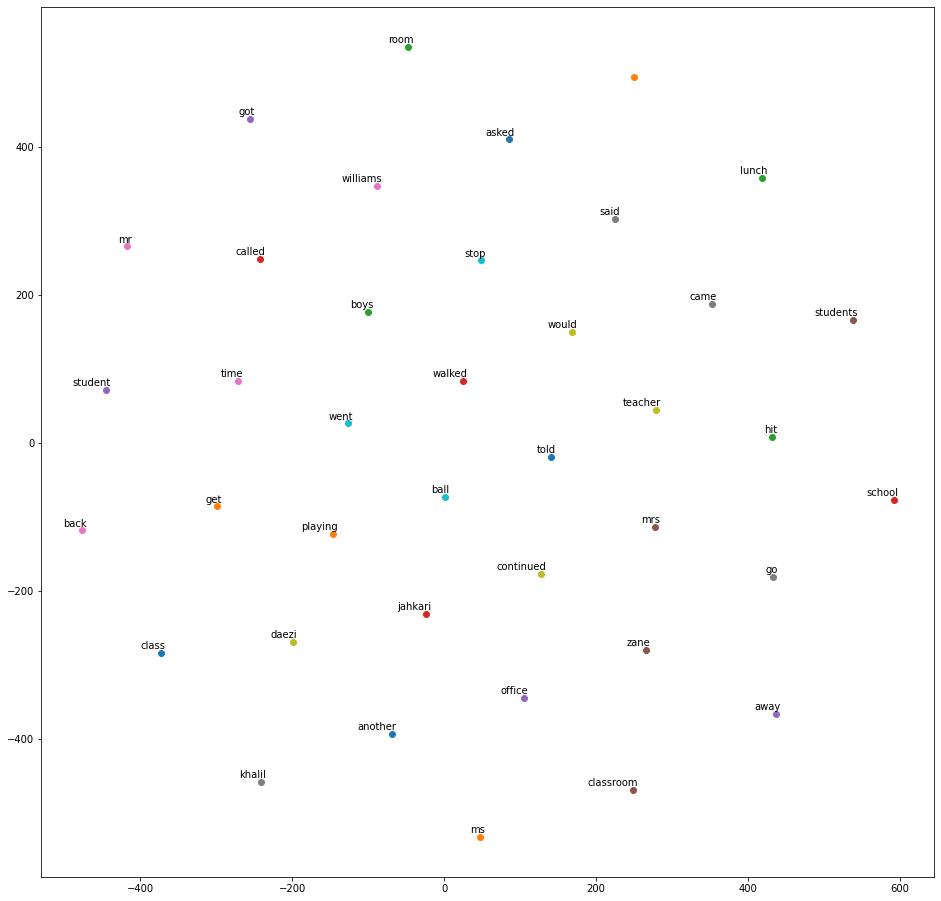

In [ ]:
# A more selective model
model1 = word2vec.Word2Vec(corpus, size=100, window=20, min_count=3, workers=4)
tsne_plot(model1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


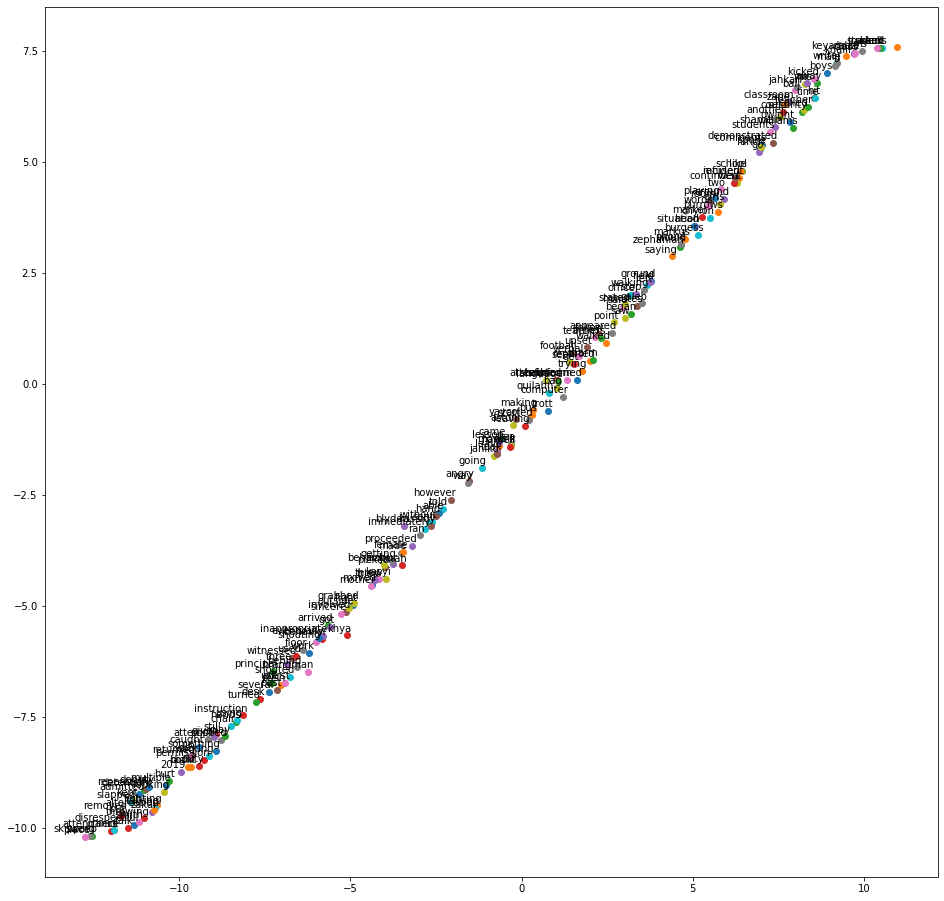

In [ ]:
# A less selective model
model = word2vec.Word2Vec(corpus, size=80, window=50, min_count=10, workers=4)
tsne_plot(model)

In [ ]:
model.most_similar('walking')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('walkng', 0.7617052793502808),
 ('waling', 0.7350203990936279),
 ('locationwalking', 0.7182509303092957),
 ('spitting', 0.7120993733406067),
 ('goldmine', 0.6016842722892761),
 ('downtownwaterfront', 0.5912593007087708),
 ('conga', 0.5825145840644836),
 ('ltrain', 0.5787146091461182),
 ('wandering', 0.5749132633209229),
 ('walkable', 0.5730565786361694)]

In [ ]:
model.most_similar('pretty')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('isnt', 0.5858123898506165),
 ('ok', 0.5687914490699768),
 ('okay', 0.5374633073806763),
 ('except', 0.5353312492370605),
 ('fine', 0.5077452659606934),
 ('alright', 0.49901533126831055),
 ('fairly', 0.4921112060546875),
 ('kinda', 0.471736341714859),
 ('wasnt', 0.4558175504207611),
 ('quite', 0.4411103129386902)]